<a href="https://colab.research.google.com/github/YounesseELH/Machine-learning-Basics/blob/main/Python%20SKLEARN/LinearRegression_KNN_Supervised_Learning/LinearRegression_KNN_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)
m=100
x = np.linspace(0,10,m).reshape(m,1)
y = x + np.random.randn(m,1)

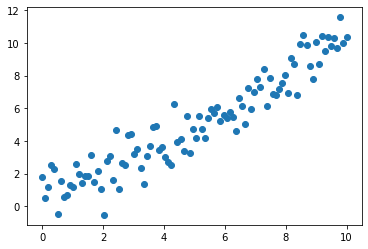

In [5]:
plt.scatter(x,y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.8881140743377214

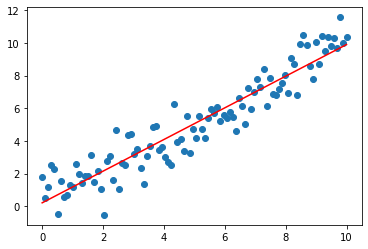

In [10]:
from IPython.core.pylabtools import print_figure
prediction = model.predict(x)
plt.scatter(x,y)
plt.plot(x,prediction,c='r')

# Classification KNN : Exemple de dataset du titanic

In [14]:
import pandas as pd

In [19]:
 #uploader le dataset
from google.colab import files
import io
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [20]:
df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']),sep=";")


In [22]:
df.shape

(1310, 14)

In [23]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
#Filtrer
df = df[['survived','pclass','sex','age']]
df

,survived,pclass,sex,age
0,1.0,1.0,female,29
1,1.0,1.0,male,"0,9167"
2,0.0,1.0,female,2
3,0.0,1.0,male,30
4,0.0,1.0,female,25
...,...,...,...,...
1305,0.0,3.0,female,NaN
1306,0.0,3.0,male,"26,5"
1307,0.0,3.0,male,27
1308,0.0,3.0,male,29


In [29]:
df.dropna(axis=0,inplace=True)
#Eleminer les strings et les remplacer par des 0 et 1
df['sex'].replace(['male','female'],[0,1],inplace=True)
df.head()

,survived,pclass,sex,age
0,1.0,1.0,1,29
1,1.0,1.0,0,"0,9167"
2,0.0,1.0,1,2
3,0.0,1.0,0,30
4,0.0,1.0,1,25


In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [65]:
df["age"] = (df["age"].str.split()).apply(lambda x: float(x[0].replace(',', '')))


In [66]:
y = df['survived']
x = df.drop('survived',axis=1)

In [67]:
y.head()

0    1.0
2    0.0
3    0.0
4    0.0
5    1.0
Name: survived, dtype: float64

In [68]:
x.head()

,pclass,sex,age
0,1.0,1,29.0
2,1.0,1,2.0
3,1.0,0,30.0
4,1.0,1,25.0
5,1.0,0,48.0


In [69]:
model.fit(x,y)
model.score(x,y)

0.8365384615384616

# **Une fonction pour predire la survie d'un personne**

In [76]:
def survie(model,pclass=1,sex=1,age=30):
  x = np.array([pclass,sex,age]).reshape(1,3)
  print(model.predict(x))
  print(model.predict_proba(x))

In [77]:
survie(model)

[1.]
[[0. 1.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [75]:
survie(model,3,0,20)

[0.]
[[0.6 0.4]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [78]:
survie(model,1,1,10)

[0.]
[[0.8 0.2]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
